<a href="https://colab.research.google.com/github/jansoe/AIHorizons24/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Perceptron


In [15]:
# @title
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# adjusting visual output
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 5)
rcParams['axes.grid'] = False

## Simulate a dataset

**Start executing here for a restart with a different dataset**

First we simulate a dataset to test our algorithm

* There are 2 classes/categories
  * Every class hat 2 properties

In [16]:
n_datapoint = 30 # number of samples
separation = 1 # how strong are the 2 classes seperated
random_seed = 40

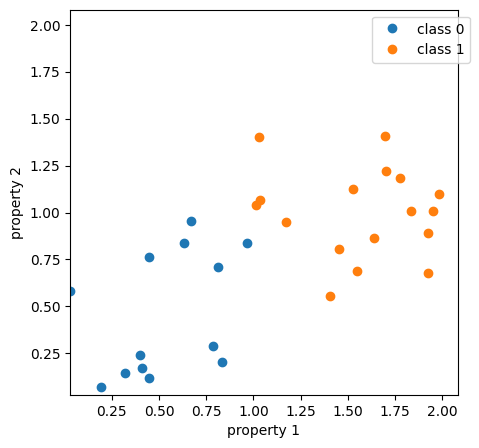

In [17]:
# @title ...
np.random.seed(random_seed)

# generate data

def generate_data(n_datapoint, separation):
    data = np.random.rand(n_datapoint,2)
    targets = 1.*(np.random.rand(n_datapoint)<0.5)
    data[targets==1, 0] += separation
    data[targets==1, 1] += 0.5*separation
    return data, targets

data, targets = generate_data(n_datapoint, separation)

# function to plot the data
def plot_data(data, targets, ax, marker='o'):

    ax.plot(data[targets==0,0], data[targets==0,1], marker, label='class 0')
    ax.plot(data[targets==1,0], data[targets==1,1], marker, label='class 1')

    minval = data.min()
    maxval = data.max()
    lim = [0.95*minval,1.05*maxval]
    plt.ylim(lim)
    plt.xlim(lim)
    plt.xlabel("property 1")
    plt.ylabel("property 2")

    return lim

# plot the data
fig, ax = plt.subplots(figsize=(5,5))
_ = plot_data(data, targets, ax)
_ = plt.legend(bbox_to_anchor=(1.05, 1))

## Perceptron

**Start executing here for a restart of the perceptron learning**

We define a perceptron which assings each 2d-input vector `x` to a class (either 0 or 1) depending on its parameter `w0, w1, theta`.

In [18]:
def perceptron(x, w0, w1, b):
    activation = x[0]*w0 + x[1]*w1
    output = int(activation > b)
    return output

for a randomly choosen parameter set ...

In [19]:
w0 = 0
w1 = 1
b = 1

num_updates =  0

... the perceptron gives us a class:

In [20]:
x = [0, 0.5]
perceptron(x, w0, w1, b)

0

That is, with the perceptron we can classify each point in our property space

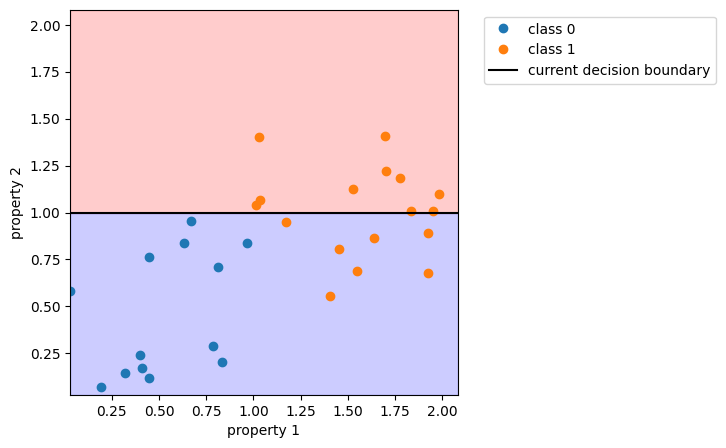

In [21]:
# @title ...
import time
import matplotlib

def plot_boundary(w0, w1, b, lim, ax, background = True,  **kwargs):
    """ plot the decision boundary paramterized by w and theta within the bounds
        of a square described by lim."""

    theta = -b
    if (w0==0) and (w1==0):
        x0 = lim
        x1 = [theta, theta]
    elif w1 == 0:
        # senkrecht
        x0 = [-theta/w0]*2
        x1 = [lim]
    else:
        x0 = lim
        #x1 = [(x*w0/w1 + theta) for x in x0]
        x1 = [(-x*w0 - theta)/w1 for x in x0]

    ax.plot(x0, x1, 'k', **kwargs)
    plt.xlim(lim)

    class_00=perceptron((x0[0], x0[0]), w0, w1, theta),
    if background:
        mi, ma = x0
        b_x0, b_x1 = x1
        #color1 = 'b' if w0 < w1 else 'r'
        #color2 = 'r' if color1 == 'b' else 'b'
        color1 = 'b' if (class_00 and (b_x0 <0)) else 'r'
        color2 = 'r' if color1 == 'b' else 'b'
        area_0 = matplotlib.patches.Polygon(
            [(mi, b_x0), (ma, b_x1), (ma, ma), (mi, ma), (mi, b_x0)],
            #[(x0[0], x1[0]), (x0[1], x1[1]),
            #(x0[1], x0[0]), (x0[0], x0[0]),
            #(x0[0], x1[1]), (x0[0], x0[1]),
            #],
            alpha=0.2, color=color1
        )
        area_1 = matplotlib.patches.Polygon(
            [(mi, b_x0), (ma, b_x1), (ma, mi), (mi, mi), (mi, b_x0)],
            #[(x0[1], x0[1]), (x0[0], x0[1]), (x0[0], x1[0]),
            #(x0[1], x1[1]), (x0[1], x0[0]), (x0[1], x1[0])],
            alpha=0.2, color=color2
        )
        plt.gca().add_patch(area_0)
        plt.gca().add_patch(area_1)


class TrennebenenPlotter():

    def __init__(self, data, targets, w0, w1, theta):

        self.data = data
        self.targets = targets
        self.w0_old = w0
        self.w1_old = w1
        self.theta_old = theta


    def plot_update(self, datenpunkt, w0, w1, theta, old=True):

        fig, ax = plt.subplots(figsize=(5,5))
        lim = plot_data(self.data, self.targets, ax)
        plot_boundary(w0, w1, theta, lim, ax, label='decision boundary after update')

        if old:
            plot_boundary(
                self.w0_old, self.w1_old, self.theta_old, lim, ax,
                background = False, alpha=0.2, label='decision boundary before'
            )
            ax.plot(datenpunkt[0], datenpunkt[1], 'or', markersize = 10, mfc='none')
            _ = plt.legend(bbox_to_anchor=(1.05, 1))

        # we save the old values to visualize later
        self.w0_old = w0
        self.w1_old = w1
        self.theta_old = theta


vis = TrennebenenPlotter(data, targets, w0, w1, b)
fig, ax = plt.subplots(figsize = (5,5))
lim = plot_data(data, targets, ax)
_ = plot_boundary(w0,  w1, b, lim, ax,
    label="current decision boundary")
_ = plt.legend(bbox_to_anchor=(1.05, 1))


### Task: Manual Optimization
Can you find parameters for the perceptron that explain the data perfectly?

### Learning

In [22]:
steps = 200 # How many samples are checkeded
learnrate = 0.1 # How strong is an update

wait_time = 2 # Time between plotting the next update (to be able to better follow)

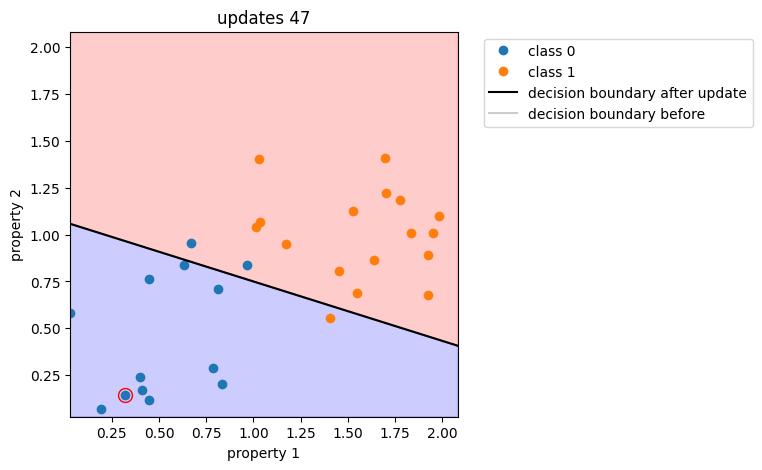

In [ ]:
#@title ...
for i in range(steps):

    # choose the next datapoint
    next_index = num_updates % len(data)
    data_point = data[next_index]
    target_output = targets[next_index]

    # calculate the output
    perceptron_output = perceptron(data_point, w0, w1, b)

    # and compare with the target output
    error = target_output - perceptron_output

    if error != 0:
        # adjust weights and threshold based on the error
        w0 = w0 + learnrate * error * data_point[0]
        w1 = w1 + learnrate * error * data_point[1]
        b = b - learnrate * error

    # visualization
    if wait_time > 0:
        clear_output(wait=True)  # Clear the output to make room for the next plot
        vis.plot_update(data_point, w0, w1, b)
        plt.title('updates '+str(num_updates))
        plt.show()

    if steps > 1:
        time.sleep(wait_time)  # Add a small delay to see the plots updating

    num_updates += 1

# Final plot
clear_output(wait=True)
vis.plot_update(data_point, w0, w1, b, old=False)
plt.title('updates '+str(num_updates))

## Tasks: Experiments

Start with a perceptron with `w0 = 0`, `w1 = 1` and `b = 1`

1. Choose a very high (10) and a very low learning rate (0.01). What do you observe?

2. Change the parameter `separation` ot `0.8`. Try again different learning rates. What do you observe?

Your observations:



## Generalization
When we observe new data, we can test how well our model works for unseen data.

In [ ]:
#Generate 100 new datapoints
data_new, targets_new = generate_data(100, separation)

In [ ]:
# @title ...

fig, ax = plt.subplots(figsize=(5,5))
_ = plot_data(data, targets, ax)
lim = plot_data(data_new, targets_new, ax, marker='x')
_ = plot_boundary(w0,  w1, b, lim, ax,
    label="current decision boundary")
_ = plt.legend(bbox_to_anchor=(1.05, 1))
